<div class="alert alert-block alert-info">
<span style="font-family:Georgia; font-size:2.0em;"> Summer Program FGV/EMAp 2019</span> <br><br>
<span style="font-family:Georgia; font-size:1.5em;"> INTRODUCTION TO MACHINE LEARNING WITH PYTHON</span> <br><br>
<span style="font-family:Georgia; font-size:1.5em;"> Luis Gustavo Nonato </span> <br>
<span style="font-family:Georgia; font-size:1.0em;">ICMC-USP, Brazil </span>
</div>

# The following Python packages will be used in the Lab Classes:
- pandas
- numpy
- matplotlib
- sklearn
______

In [6]:
import pandas as pd
import numpy as np

# This Lab requires the file <font color=blue> domicilios-rio2010.csv </font> 

In [7]:
base = pd.read_csv('domicilios-rio2010.csv')

In [8]:
base[0:10]

,Setor,num_Habitantes,AguaADEQUADA,EsgotoADEQUADO,Medidor_Eletric,LixoADEQUADO,Analfa10a14anos,Analfa15ouMais,RespRenda_Ate1Sal,RendaPerCapita,DomRendaMedia,Classe_Econ
0,60026,266.935012,100.000000,100.000000,100.000000,100.000000,2.325581,3.267045,20.848057,742.749412,2230.872792,D
1,60027,242.484728,100.000000,100.000000,98.795181,100.000000,0.000000,3.161398,30.522088,666.727031,2010.891566,D
2,60028,149.989149,100.000000,100.000000,98.378378,100.000000,0.000000,1.196172,25.405405,571.290323,1627.405405,D
3,60029,381.858078,100.000000,100.000000,99.693252,98.466258,4.166667,0.882029,25.153374,585.449177,1855.119632,D
4,60030,296.154714,100.000000,100.000000,99.689441,100.000000,1.369863,3.552632,21.739130,642.935079,1906.841615,D
5,60031,213.069956,100.000000,100.000000,100.000000,100.000000,0.000000,2.027027,27.777778,349.825581,835.694444,E
6,60032,188.695124,100.000000,99.626866,99.253731,100.000000,1.219512,4.873950,44.029851,385.867347,1128.805970,E
7,60033,245.018845,97.785978,98.523985,72.324723,98.892989,1.162791,6.068966,49.077491,377.782474,1352.210332,D
8,60034,823.105789,99.285714,100.000000,95.000000,100.000000,5.970149,2.311248,37.500000,452.229913,1306.621429,D
9,60035,544.132352,100.000000,99.610895,100.000000,100.000000,0.000000,0.922509,38.521401,510.029369,1351.478599,D


## <font color=blue> Principal Component Analysis - PCA </font>

In [9]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

###########
# reading data_frame
###########
df = pd.read_csv('domicilios-rio2010.csv')

print(df.columns)  ## nomes das colunas
print(df.shape)  ##tamanho do arquivo

###########
# cleaning the data (remove rows with NaN)
###########

df.dropna(how='any',inplace=True)  ##dropna elimina 
print(df.shape)

###########
# converting data columns to numpy array
###########

columns = ['num_Habitantes','AguaADEQUADA', 'EsgotoADEQUADO',
      'Medidor_Eletric', 'LixoADEQUADO', 'Analfa10a14anos', 'Analfa15ouMais',
      'RespRenda_Ate1Sal', 'RendaPerCapita', 'DomRendaMedia']

data = df[columns].values  ##matriz de dados

# data = df[['AguaADEQUADA', 'EsgotoADEQUADO',
#        'Medidor_Eletric', 'LixoADEQUADO', 'Analfa10a14anos', 'Analfa15ouMais',
#        'RespRenda_Ate1Sal', 'RendaPerCapita', 'DomRendaMedia']].values

print(data.shape)

# data = df[['AguaADEQUADA', 'EsgotoADEQUADO',
#        'Medidor_Eletric', 'LixoADEQUADO', 'Analfa10a14anos', 'Analfa15ouMais',
#        'RespRenda_Ate1Sal']].values


Index(['Setor', 'num_Habitantes', 'AguaADEQUADA', 'EsgotoADEQUADO',
       'Medidor_Eletric', 'LixoADEQUADO', 'Analfa10a14anos', 'Analfa15ouMais',
       'RespRenda_Ate1Sal', 'RendaPerCapita', 'DomRendaMedia', 'Classe_Econ'],
      dtype='object')
(10230, 12)
(10142, 12)
(10142, 10)


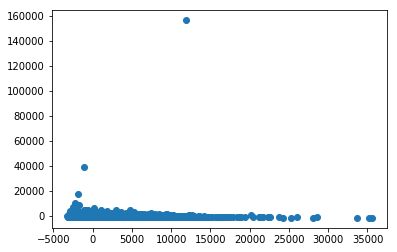

In [10]:
###########
# projecting data in 2D
###########

pca_proj1=PCA(n_components=2) ##número de componentes para visualizar pontos
data_2d=pca_proj1.fit_transform(data) ## esse comendo calcula uma direção principal, em relação à variância. 

plt.scatter(data_2d[:,0],data_2d[:,1])

### Outliers hamper PCA analysis

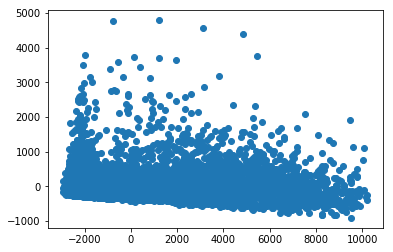

In [11]:
from scipy import stats

###########
# Analyzing and Removing outliers via Z-score method
###########

data_zscore = stats.zscore(data,axis=0)  ##transforma os dados segundo o calculo de score (média zero e desvio unitário)

outliers_ids = np.where(np.abs(data_zscore)>3)[0]  ##retirna uma lista de linhas e colunas. Retiro as linhas outliers
non_outliers_ids = [i for i in range(data.shape[0]) if i not in outliers_ids] ## retiro os valores 
data_filtered = data[non_outliers_ids,:]


pca_proj2=PCA(n_components=2)
data_2d_filtered=pca_proj2.fit_transform(data_filtered)

plt.scatter(data_2d_filtered[:,0],data_2d_filtered[:,1])

[7.34750912e+06 1.84225311e+05 4.00646927e+04 1.24929578e+02
 5.89250203e+01 4.59193682e+01 6.11281756e+00 4.11406834e+00
 2.36861270e+00 1.39556050e+00]
[9.70347003e-01 2.43296708e-02 5.29113388e-03 1.64987943e-05
 7.78191846e-06 6.06433017e-06 8.07287762e-07 5.43323433e-07
 3.12810259e-07 1.84304358e-07]


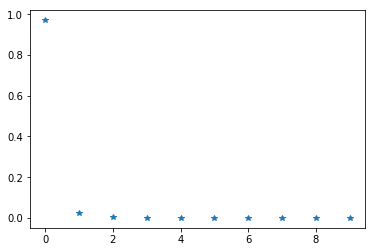

In [12]:
#############
# amount of explained variance 
#############

data_pca = PCA(svd_solver='full')  ##decomposicao svd para encontrar autovalores e autovetores
#data_pca.fit(data[1:])
data_pca.fit(data_filtered)
print(data_pca.explained_variance_)
print(data_pca.explained_variance_ratio_)

plt.plot(data_pca.explained_variance_ratio_, '*')

In [14]:
#######
# finding the most relevant attributes
#######

print(np.abs(data_pca.components_[0:2,:]))  ##os dados podem exlicados pelos maiores valores desse caso

rel_attrib = np.argsort(np.abs(data_pca.components_[0:2,:]))  ##função que retorna os indíces de uma ordenação
print(rel_attrib.shape)

print([columns[i] for i in rel_attrib[0:2,0:3].ravel()])  ##ravel concatena linhas. 


[[2.81975994e-02 8.61813462e-05 5.19941750e-04 1.26571495e-03
  4.93735833e-05 2.22368493e-04 4.86749938e-04 3.44156222e-03
  3.89438029e-01 9.20613330e-01]
 [9.76689012e-01 4.97964360e-04 1.11433057e-03 1.17054238e-03
  8.24246836e-06 1.75117781e-04 7.37905070e-04 1.50028628e-03
  1.85320006e-01 1.08302280e-01]]
(2, 10)
['LixoADEQUADO', 'AguaADEQUADA', 'Analfa10a14anos', 'LixoADEQUADO', 'Analfa10a14anos', 'AguaADEQUADA']


Homework
Noise removal via PCA
Consider a data set generated from a trivariate Normal distribution centered at the origin with covariance matriz given by: $$
\left[\begin{array}{ccc}
1.6 &amp; 0.6 &amp; 0.8\\
0.6 &amp; 1.6 &amp; 0.8\\
0.8 &amp; 0.8 &amp; 1.3
\end{array}\right]
$$

Using PCA, remove the noise of the data by zeroing the principal direction with smallest variance. Make a 3D scatter plot to make sure that, after noise removal, the data will be contained in a plane in 3D space.

## Solution

<IPython.core.display.Javascript object>


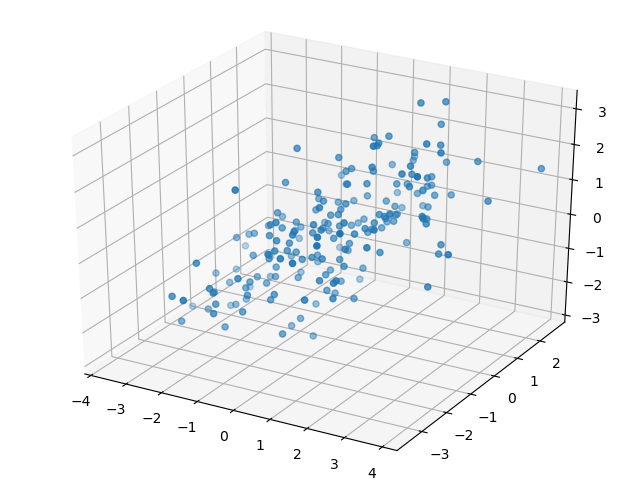

In [5]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
#%matplotlib inline

S = np.asarray([[1.6,0.6,0.8],[0.6,1.6,0.8],[0.8,0.8,1.3]])

X = np.random.multivariate_normal(np.zeros((3,)),S,size=200)

fig = plt.figure(1)
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],X[:,2])